In [492]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [493]:
df = pd.read_excel("D:\Copper modling\Copper_Set.xlsx")



In [494]:

for i in df.columns:
  print(f"{i}:{df[i].nunique()}")

id:181671
item_date:252
quantity tons:181673
customer:1169
country:17
status:9
item type:7
application:30
thickness:594
width:1386
material_ref:16563
product_ref:33
delivery date:28
selling_price:9795


In [495]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [497]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,20200929.0,20201130.0,2.021020e+07,2.021040e+07
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,30196884.0,30205242.0,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,26.0,30.0,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,10.0,15.0,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,0.7,1.5,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1180.0,1250.0,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,611993.0,640665.0,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,20201101.0,20210101.0,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,669.0,812.0,9.530000e+02,1.000010e+08


In [498]:
df.customer.value_counts


<bound method IndexOpsMixin.value_counts of 0         30156308.0
1         30202938.0
2         30153963.0
3         30349574.0
4         30211560.0
             ...    
181668    30200854.0
181669    30200854.0
181670    30200854.0
181671    30200854.0
181672    30200854.0
Name: customer, Length: 181673, dtype: float64>

In [499]:
df.drop_duplicates().shape


(181673, 14)

In [500]:
df.isna().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [501]:
df['material_ref'] = df['material_ref'].replace(r'^00000.*$', None, regex=True)


In [502]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [503]:
# Impute numeric columns with mean or median
df['selling_price'] = df['selling_price'].fillna(df['selling_price'].mean())
df['thickness'] = df['thickness'].fillna(df['thickness'].median())

# Impute categorical columns with mode
df['status'] = df['status'].fillna(df['status'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['application'] = df['application'].fillna(df['application'].mode()[0])

# Drop 'material_ref' column if it has too many missing values
df = df.drop(columns=['material_ref'])




In [504]:
df.isna().sum()

id               2
item_date        1
quantity tons    0
customer         1
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    1
selling_price    0
dtype: int64

In [231]:
#df.dropna(subset=['item_date', 'delivery date'], inplace=True)



In [505]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [506]:
df["quantity tons"] = pd.to_numeric(df["quantity tons"], errors='coerce') 



In [507]:
# Convert `item_date` to a datetime type and extract the year and month
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce')



In [508]:

df['lead_time'] = (df['delivery date'] - df['item_date']).dt.days


In [509]:
# Assume 'lead_time' is the column with lead time values
df['lead_time'] = df['delivery date'] - df['item_date']

# If negative lead times are errors, set them to NaN
#df.loc[df['lead_time'] < pd.Timedelta(0), 'lead_time'] = pd.NaT

# Alternatively, if you want to set negative lead times to zero
df.loc[df['lead_time'] < pd.Timedelta(0), 'lead_time'] = pd.Timedelta(0)

# Or remove rows with negative lead times
# df = df[df['lead_time'] >= pd.Timedelta(0)]


In [510]:
df.isnull().sum()

id               2
item_date        3
quantity tons    1
customer         1
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    3
selling_price    0
lead_time        6
dtype: int64

In [511]:
df.shape

(181673, 14)

In [512]:
df.dropna(subset=['item_date', 'delivery date', 'quantity tons', 'lead_time','customer'], inplace=True)



In [513]:
df['lead_time'] = df['lead_time'].dt.days


In [514]:
# Count rows where lead_time is 0
zero_lead_time_count = (df['lead_time'] == 0).sum()
zero_lead_time_count


np.int64(16567)

In [515]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,lead_time
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00,91
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00,0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33,0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00,0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,2020-07-01,591.00,0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,2020-07-01,589.00,0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,2020-07-01,619.00,0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,2020-07-02,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,2020-07-01,601.00,0


## outliers

In [516]:
df.describe()

,item_date,quantity tons,customer,country,application,thickness,width,product_ref,delivery date,selling_price,lead_time
count,181665,1.816650e+05,1.816650e+05,181665.000000,181665.000000,181665.000000,181665.000000,1.816650e+05,181665,1.816650e+05,181665.000000
mean,2020-11-26 22:57:24.656923904,5.875149e+03,3.051222e+07,44.897999,25.613789,2.564873,1295.287072,4.739686e+08,2021-01-25 22:44:57.012633088,1.918082e+03,62.061393
min,2020-07-02 00:00:00,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2019-04-01 00:00:00,-1.160000e+03,0.000000
25%,2020-09-29 00:00:00,1.096990e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2020-11-01 00:00:00,6.690000e+02,28.000000
50%,2020-11-30 00:00:00,3.036411e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2021-01-01 00:00:00,8.120000e+02,59.000000
75%,2021-02-03 00:00:00,6.715909e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2021-04-01 00:00:00,9.530000e+02,97.000000
max,2021-04-01 00:00:00,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2022-01-01 00:00:00,1.000010e+08,448.000000
std,NaN,2.349126e+06,2.433428e+07,24.405804,17.753693,6.572439,261.635926,7.175107e+08,NaN,3.318020e+05,42.203594


In [517]:
del df["item_date"]
del df["id"]
del df["customer"]
del df["delivery date"]
#del df["product_ref"]

In [518]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)

In [519]:
df['quantity tons'].unique()

array([ 54.15113862, 768.0248392 , 386.12794891, ..., 208.08646861,
         4.23559357, 406.68653838])

In [520]:
df.isna().sum()

quantity tons    4
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
lead_time        0
dtype: int64

In [521]:
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)

C:\Users\SUBBULASKSHMI S\AppData\Local\Temp\ipykernel_18796\1785227444.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)


In [522]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    

In [523]:
outlier(df, "quantity tons")
outlier(df, "selling_price")
outlier(df, "thickness")
outlier(df, "width")


In [398]:
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    sns.boxplot(y=df)
import seaborn as sns
import matplotlib.pyplot as plt

def box(df, column):
    # Create a boxplot for the specified column
    sns.boxplot(y=df[column])

    # Set the title for the plot
    plt.title(f'Boxplot for {column}')

    # Show the plot
    plt.show()

    # Show the plot
    plt.show()


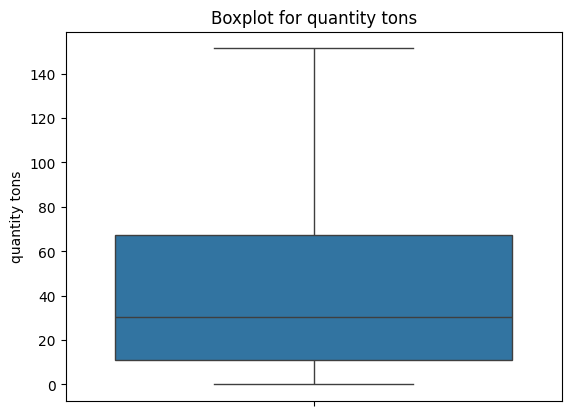

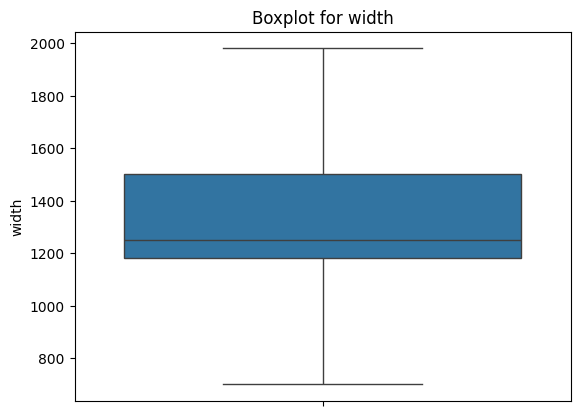

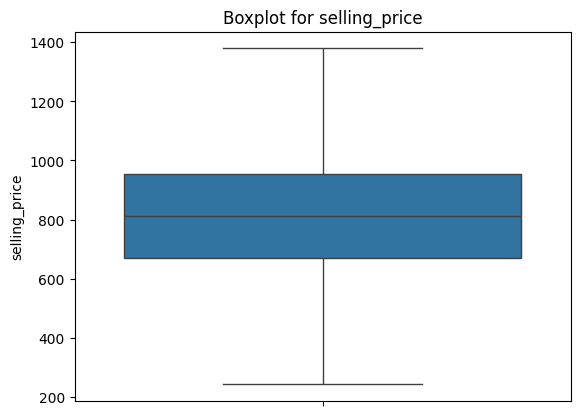

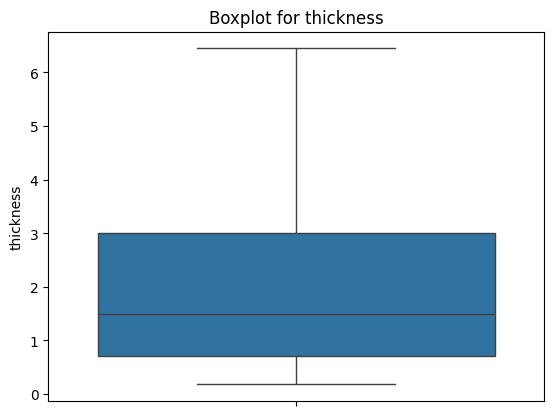

In [252]:
box(df, "quantity tons")
box(df, 'width')  # For example, to plot the boxplot of 'quantity tons'
box(df, 'selling_price')
box(df, "thickness")

In [524]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [526]:
mean_product_ref = df.groupby("item type")["selling_price"].mean()

# Sort the means by selling_price (values in the Series)
mean_product_ref_sorted = mean_product_ref.sort_values()
mean_product_ref_sorted 

# Display the sorted means

item type
WI         692.460859
PL         720.393267
Others     764.004197
IPL        778.907407
S          803.878266
W          835.241545
SLAWR     1195.000000
Name: selling_price, dtype: float64

In [ ]:
unique_values1 = np.sort(df['encoded_reference'].unique())
unique_values2 = np.sort(df['product_ref'].unique())
unique_values1, unique_values2

In [528]:
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})


In [529]:
df['item type'].unique()


array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [530]:
from sklearn.preprocessing import OrdinalEncoder

# Make sure 'item type' column is categorical
df['product_ref_encode'] = OrdinalEncoder().fit_transform(df[['product_ref']])




In [531]:
mean_product_ref = df.groupby("country")["selling_price"].mean()

# Sort the means by selling_price (values in the Series)
mean_product_ref_sorted = mean_product_ref.sort_values()
mean_product_ref_sorted 

country
89.0      656.706522
40.0      700.108140
80.0      722.732274
79.0      758.508720
39.0      767.230027
77.0      768.388789
78.0      801.972122
26.0      809.063014
27.0      821.679987
28.0      827.946242
32.0      833.491895
25.0      836.525449
107.0     847.600000
30.0      850.767676
84.0      859.060792
38.0      870.921145
113.0    1124.245098
Name: selling_price, dtype: float64

In [546]:
df['country_encoded'] = df['country'].map({
    89.0: 0,
    40.0: 1,
    80.0: 2,
    79.0: 3,
    39.0: 4,
    77.0: 5,
    78.0: 6,
    26.0: 7,
    27.0: 8,
    28.0: 9,
    32.0: 10,
    25.0: 11,
    107.0: 12,
    30.0: 13,
    84.0: 14,
    38.0: 15,
    113.0: 16
})


In [547]:
mean_product_ref = df.groupby("application")["selling_price"].mean()

# Sort the means by selling_price (values in the Series)
mean_product_ref_sorted = mean_product_ref.sort_values()
mean_product_ref_sorted 

application
58.0     598.266219
68.0     604.729282
59.0     711.155600
56.0     717.966385
28.0     726.369290
69.0     735.721311
22.0     747.305445
25.0     752.237877
4.0      755.164912
15.0     755.518811
40.0     762.147843
3.0      778.499239
66.0     780.062674
20.0     785.134427
39.0     788.921348
10.0     790.958861
5.0      795.754182
26.0     799.678788
27.0     804.836603
67.0     808.040724
19.0     830.118881
29.0     841.753758
2.0      844.500000
65.0     858.615385
70.0     860.940594
79.0     888.035035
42.0     898.763649
41.0     926.179231
38.0     935.072407
99.0    1087.691781
Name: selling_price, dtype: float64

In [534]:
df['application_encoded'] = df['application'].map({
    58.0: 0,
    68.0: 1,
    59.0: 2,
    56.0: 3,
    28.0: 4,
    69.0: 5,
    22.0: 6,
    25.0: 7,
    4.0: 8,
    15.0: 9,
    40.0: 10,
    3.0: 11,
    66.0: 12,
    20.0: 13,
    39.0: 14,
    10.0: 15,
    5.0: 16,
    26.0: 17,
    27.0: 18,
    67.0: 19,
    19.0: 20,
    29.0: 21,
    2.0: 22,
    65.0: 23,
    70.0: 24,
    79.0: 25,
    42.0: 26,
    41.0: 27,
    38.0: 28,
    99.0: 29
}
)

In [535]:
mean_product_ref = df.groupby("product_ref")["selling_price"].mean()

# Sort the means by selling_price (values in the Series)
mean_product_ref_sorted = mean_product_ref.sort_values()
mean_product_ref_sorted 

product_ref
640665         678.562704
1721130331     701.136187
1693867563     713.126280
1671876026     719.866294
1670798778     729.503402
1665584662     731.000000
628377         740.287015
640405         741.668634
1671863738     757.971389
640400         763.643373
929423819      785.000000
164141591      788.332179
1690738206     798.095238
628117         804.647613
1693867550     806.071408
1332077137     807.137266
628112         812.307345
1722207579     816.264000
164336407      824.306122
164337175      830.944870
1668701725     835.719643
1282007633     845.366548
1668701376     851.241176
1665572374     878.752475
1668701718     881.064922
1690738219     886.842105
1668701698     904.410642
1665572032     908.800000
1665584320     923.833333
1665584642     928.500000
611993         995.368703
611733         996.288889
611728        1325.337838
Name: selling_price, dtype: float64

In [536]:
df['product_ref_encode'] = df['product_ref'].map({
    640665: 0,
    1721130331: 1,
    1693867563: 2,
    1671876026: 3,
    1670798778: 4,
    1665584662: 5,
    628377: 6,
    640405: 7,
    1671863738: 8,
    640400: 9,
    929423819: 10,
    164141591: 11,
    1690738206: 12,
    628117: 13,
    1693867550: 14,
    1332077137: 15,
    628112: 16,
    1722207579: 17,
    164336407: 18,
    164337175: 19,
    1668701725: 20,
    1282007633: 21,
    1668701376: 22,
    1665572374: 23,
    1668701718: 24,
    1690738219: 25,
    1668701698: 26,
    1665572032: 27,
    1665584320: 28,
    1665584642: 29,
    611993: 30,
    611733: 31,
    611728: 32
}

)

In [537]:
df.dtypes

quantity tons          float64
country                float64
status                   int64
item type               object
application            float64
thickness              float64
width                  float64
product_ref              int64
selling_price          float64
lead_time                int64
product_ref_encode       int64
country_encoded        float64
application_encoded      int64
dtype: object

In [548]:
df

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time,product_ref_encode,country_encoded,application_encoded
0,54.151139,28.0,1,5.0,10.0,2.00,1500.0,1670798778,854.00,91,4,9,15
1,151.441652,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,0,24,11,27
2,151.441652,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,0,6,13,4
3,151.441652,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,0,24,10,2
4,151.441652,28.0,1,5.0,10.0,4.00,1980.0,640665,577.00,0,0,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,1,5.0,41.0,0.96,1220.0,164141591,591.00,0,11,11,27
181669,151.441652,25.0,1,5.0,41.0,0.95,1500.0,164141591,589.00,0,11,11,27
181670,4.235594,25.0,1,5.0,41.0,0.71,1250.0,164141591,619.00,0,11,11,27
181671,30.364989,25.0,1,5.0,41.0,0.85,1250.0,164141591,601.00,0,11,11,27


In [540]:
from sklearn.preprocessing import OrdinalEncoder

# Make sure 'item type' column is categorical
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])


In [414]:
# Group by 'product_ref' and calculate the mean of 'selling_price'
mean_product_ref = df.groupby("application")["selling_price"].mean()

# Sort the means by selling_price (values in the Series)
mean_product_ref_sorted = mean_product_ref.sort_values()

# Display the sorted means
mean_product_ref_sorted


application
58.0     598.266219
68.0     604.729282
59.0     711.155600
56.0     717.966385
28.0     726.369290
69.0     735.721311
22.0     747.305445
25.0     752.237877
4.0      755.164912
15.0     755.518811
40.0     762.147843
3.0      778.499239
66.0     780.062674
20.0     785.134427
39.0     788.921348
10.0     790.958861
5.0      795.754182
26.0     799.678788
27.0     804.836603
67.0     808.040724
19.0     830.118881
29.0     841.753758
2.0      844.500000
65.0     858.615385
70.0     860.940594
79.0     888.035035
42.0     898.763649
41.0     926.179231
38.0     935.072407
99.0    1087.691781
Name: selling_price, dtype: float64

In [259]:
# Group by 'product_ref' and calculate the mean of 'selling_price'
mean_product_ref = df.groupby("product_ref")["selling_price"].mean()

# Sort the means by selling_price (values in the Series)
mean_product_ref_sorted = mean_product_ref.sort_values()

# Display the sorted means
mean_product_ref_sorted


product_ref
640665         678.562704
1721130331     701.136187
1693867563     713.126280
1671876026     719.866294
1670798778     729.503402
1665584662     731.000000
628377         740.287015
640405         741.668634
1671863738     757.971389
640400         763.643373
929423819      785.000000
164141591      788.332179
1690738206     798.095238
628117         804.647613
1693867550     806.071408
1332077137     807.137266
628112         812.307345
1722207579     816.264000
164336407      824.306122
164337175      830.944870
1668701725     835.719643
1282007633     845.366548
1668701376     851.241176
1665572374     878.752475
1668701718     881.064922
1690738219     886.842105
1668701698     904.410642
1665572032     908.800000
1665584320     923.833333
1665584642     928.500000
611993         995.368703
611733         996.288889
611728        1325.337838
Name: selling_price, dtype: float64

In [420]:
mean_product_ref = df.groupby("country")["selling_price"].mean()

# Sort the means by selling_price (values in the Series)
mean_product_ref_sorted = mean_product_ref.sort_values()

# Display the sorted means
mean_product_ref_sorted


country
89.0      656.706522
40.0      700.108140
80.0      722.732274
79.0      758.508720
39.0      767.230027
77.0      768.388789
78.0      801.972122
26.0      809.063014
27.0      821.679987
28.0      827.946242
32.0      833.491895
25.0      836.525449
107.0     847.600000
30.0      850.767676
84.0      859.060792
38.0      870.921145
113.0    1124.245098
Name: selling_price, dtype: float64

In [418]:
unique_values1 = np.sort(df['encoded_country'].unique())
unique_values2 = np.sort(df['country'].unique())
unique_values1, unique_values2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 array(['107.0', '113.0', '25.0', '26.0', '27.0', '28.0', '30.0', '32.0',
        '38.0', '39.0', '40.0', '77.0', '78.0', '79.0', '80.0', '84.0',
        '89.0'], dtype=object))

In [368]:
mean_product_ref = df.groupby("application")["selling_price"].mean()

# Sort the means by selling_price (values in the Series)
mean_product_ref_sorted = mean_product_ref.sort_values()

# Display the sorted means
mean_product_ref_sorted


application
58.0     598.266219
68.0     604.729282
59.0     711.155600
56.0     717.966385
28.0     726.369290
69.0     735.721311
22.0     747.305445
25.0     752.237877
4.0      755.164912
15.0     755.518811
40.0     762.147843
3.0      778.499239
66.0     780.062674
20.0     785.134427
39.0     788.921348
10.0     790.958861
5.0      795.754182
26.0     799.678788
27.0     804.836603
67.0     808.040724
19.0     830.118881
29.0     841.753758
2.0      844.500000
65.0     858.615385
70.0     860.940594
79.0     888.035035
42.0     898.763649
41.0     926.179231
38.0     935.072407
99.0    1087.691781
Name: selling_price, dtype: float64

In [426]:
mean_product_ref = df.groupby("product_ref")["selling_price"].mean()

# Sort the means by selling_price (values in the Series)
mean_product_ref_sorted = mean_product_ref.sort_values()

# Display the sorted means
mean_product_ref_sorted


product_ref
640665         678.562704
1721130331     701.136187
1693867563     713.126280
1671876026     719.866294
1670798778     729.503402
1665584662     731.000000
628377         740.287015
640405         741.668634
1671863738     757.971389
640400         763.643373
929423819      785.000000
164141591      788.332179
1690738206     798.095238
628117         804.647613
1693867550     806.071408
1332077137     807.137266
628112         812.307345
1722207579     816.264000
164336407      824.306122
164337175      830.944870
1668701725     835.719643
1282007633     845.366548
1668701376     851.241176
1665572374     878.752475
1668701718     881.064922
1690738219     886.842105
1668701698     904.410642
1665572032     908.800000
1665584320     923.833333
1665584642     928.500000
611993         995.368703
611733         996.288889
611728        1325.337838
Name: selling_price, dtype: float64

In [552]:
df

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time,product_ref_encode,country_encoded,application_encoded
0,54.151139,28.0,1,5.0,10.0,2.00,1500.0,1670798778,854.00,91,4,9,15
1,151.441652,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,0,24,11,27
2,151.441652,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,0,6,13,4
3,151.441652,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,0,24,10,2
4,151.441652,28.0,1,5.0,10.0,4.00,1980.0,640665,577.00,0,0,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,1,5.0,41.0,0.96,1220.0,164141591,591.00,0,11,11,27
181669,151.441652,25.0,1,5.0,41.0,0.95,1500.0,164141591,589.00,0,11,11,27
181670,4.235594,25.0,1,5.0,41.0,0.71,1250.0,164141591,619.00,0,11,11,27
181671,30.364989,25.0,1,5.0,41.0,0.85,1250.0,164141591,601.00,0,11,11,27


In [554]:
df1=df.copy()
 # Replace 'row_index' with your desired column name
df1



,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price,lead_time,product_ref_encode,country_encoded,application_encoded
0,54.151139,28.0,1,5.0,10.0,2.00,1500.0,1670798778,854.00,91,4,9,15
1,151.441652,25.0,1,5.0,41.0,0.80,1210.0,1668701718,1047.00,0,24,11,27
2,151.441652,30.0,1,6.0,28.0,0.38,952.0,628377,644.33,0,6,13,4
3,151.441652,32.0,1,3.0,59.0,2.30,1317.0,1668701718,768.00,0,24,10,2
4,151.441652,28.0,1,5.0,10.0,4.00,1980.0,640665,577.00,0,0,9,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,25.0,1,5.0,41.0,0.96,1220.0,164141591,591.00,0,11,11,27
181669,151.441652,25.0,1,5.0,41.0,0.95,1500.0,164141591,589.00,0,11,11,27
181670,4.235594,25.0,1,5.0,41.0,0.71,1250.0,164141591,619.00,0,11,11,27
181671,30.364989,25.0,1,5.0,41.0,0.85,1250.0,164141591,601.00,0,11,11,27


In [556]:
df1 = df1.drop(["country","application","product_ref"], axis=1)

In [267]:
#Regression model for predict the leadtime

In [557]:
df2 = df1[df1['lead_time'] != 0]

In [558]:
df3 = df1[df1['lead_time'] == 0]

In [559]:
df4=df3.copy()

In [560]:
del df4['lead_time']

In [563]:
df2

,quantity tons,status,item type,thickness,width,selling_price,lead_time,product_ref_encode,country_encoded,application_encoded
0,54.151139,1,5.0,2.00,1500.0,854.0,91,4,9,15
6,3.522613,2,5.0,0.38,1125.0,243.0,91,30,13,27
8,69.071853,1,3.0,0.60,1275.0,1363.0,91,22,15,15
10,9.175770,2,5.0,0.38,1125.0,243.0,91,30,13,27
12,27.512545,1,5.0,0.75,1250.0,1098.0,91,11,6,15
...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,0,3.0,6.00,1980.0,552.0,30,0,11,9
181525,66.431473,0,3.0,3.85,1525.0,458.0,30,0,13,15
181527,63.859521,0,3.0,5.85,1525.0,457.0,30,0,13,15
181529,56.028562,0,3.0,6.45,1500.0,458.0,30,0,13,15


In [ ]:
col = ['quantity tons','status','width','thickness','selling_price','item type','lead_time',"product_ref_encode","country_encoded","application_encoded"]
df_heatmap = df2[col].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_heatmap, annot=True)


In [565]:
from sklearn.model_selection import train_test_split

X = df2.drop(columns=['lead_time'])
y = df2.loc[:, 'lead_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((123823, 9), (41275, 9), (123823,), (41275,))

In [567]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.6322836718971129

In [568]:
from sklearn.model_selection import cross_val_score

for depth in range(1,30):
  model = DecisionTreeRegressor(max_depth = depth)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.09198167192284923, Cross-ValScore: 0.09174509040551852
Depth - 2, TrainScore: 0.18124015772006874, Cross-ValScore: 0.18023183650199942
Depth - 3, TrainScore: 0.23254179878464654, Cross-ValScore: 0.23316629589343024
Depth - 4, TrainScore: 0.2944460439154152, Cross-ValScore: 0.29464669150509576
Depth - 5, TrainScore: 0.3569391788281977, Cross-ValScore: 0.35151862878746115
Depth - 6, TrainScore: 0.4140983859557815, Cross-ValScore: 0.4072551623992323
Depth - 7, TrainScore: 0.4631637125981516, Cross-ValScore: 0.45645937807335357
Depth - 8, TrainScore: 0.5160117365138955, Cross-ValScore: 0.5044945879167249
Depth - 9, TrainScore: 0.5620031537157908, Cross-ValScore: 0.5430593690803637
Depth - 10, TrainScore: 0.6074837575325678, Cross-ValScore: 0.5786736403654127
Depth - 11, TrainScore: 0.6461712260680088, Cross-ValScore: 0.607470260863436
Depth - 12, TrainScore: 0.684000033802064, Cross-ValScore: 0.6309353877198379
Depth - 13, TrainScore: 0.7238850742519474, Cross-ValS

In [569]:
model = DecisionTreeRegressor(random_state=42, max_depth=16)
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
train_score 

0.8330754035309794

In [570]:
model.predict(df4)

array([101.        ,  50.        ,  61.78378378, ...,   9.92105263,
        19.        ,  19.        ])

In [571]:
# Generate predictions
predictions = model.predict(df4)

# Convert predictions to a DataFrame
df_predictions = df4.copy()  # Copy the input DataFrame
df_predictions['lead_time'] = predictions  # Add predictions as a new column

# Display the resulting DataFrame
df_predictions


,quantity tons,status,item type,thickness,width,selling_price,product_ref_encode,country_encoded,application_encoded,lead_time
1,151.441652,1,5.0,0.80,1210.0,1047.00,24,11,27,101.000000
2,151.441652,1,6.0,0.38,952.0,644.33,6,13,4,50.000000
3,151.441652,1,3.0,2.30,1317.0,768.00,24,10,2,61.783784
4,151.441652,1,5.0,4.00,1980.0,577.00,0,9,15,68.708063
5,151.441652,1,5.0,1.50,1265.0,983.00,24,11,27,23.666667
...,...,...,...,...,...,...,...,...,...,...
181668,102.482422,1,5.0,0.96,1220.0,591.00,11,11,27,19.000000
181669,151.441652,1,5.0,0.95,1500.0,589.00,11,11,27,19.000000
181670,4.235594,1,5.0,0.71,1250.0,619.00,11,11,27,9.921053
181671,30.364989,1,5.0,0.85,1250.0,601.00,11,11,27,19.000000


In [572]:
df5 = pd.concat([df_predictions, df2], axis=0) 
df5

,quantity tons,status,item type,thickness,width,selling_price,product_ref_encode,country_encoded,application_encoded,lead_time
1,151.441652,1,5.0,0.80,1210.0,1047.00,24,11,27,101.000000
2,151.441652,1,6.0,0.38,952.0,644.33,6,13,4,50.000000
3,151.441652,1,3.0,2.30,1317.0,768.00,24,10,2,61.783784
4,151.441652,1,5.0,4.00,1980.0,577.00,0,9,15,68.708063
5,151.441652,1,5.0,1.50,1265.0,983.00,24,11,27,23.666667
...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,0,3.0,6.00,1980.0,552.00,0,11,9,30.000000
181525,66.431473,0,3.0,3.85,1525.0,458.00,0,13,15,30.000000
181527,63.859521,0,3.0,5.85,1525.0,457.00,0,13,15,30.000000
181529,56.028562,0,3.0,6.45,1500.0,458.00,0,13,15,30.000000


               Feature  Importance
5        selling_price    0.254965
7      country_encoded    0.214817
8  application_encoded    0.148284
6   product_ref_encode    0.087608
1               status    0.070121
2            item type    0.068551
0        quantity tons    0.064098
3            thickness    0.055338
4                width    0.036219


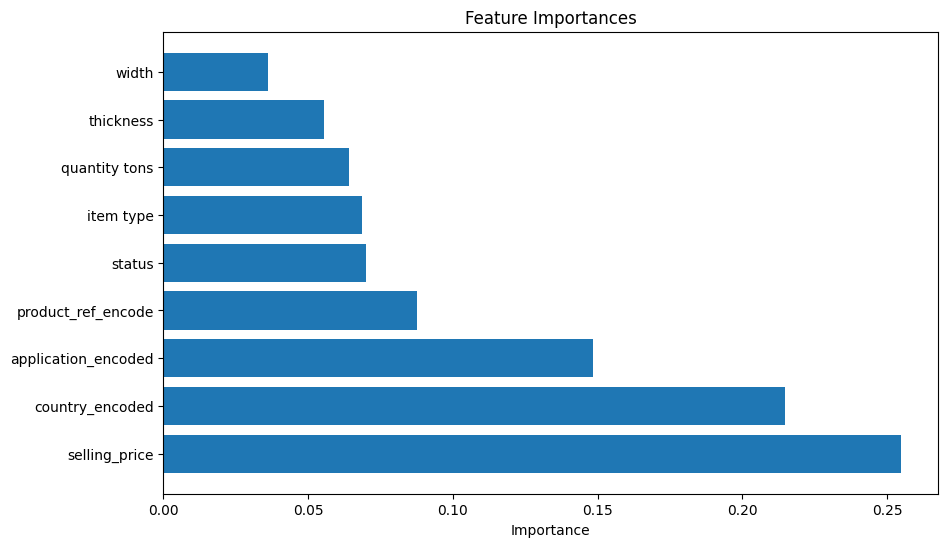

In [573]:

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [574]:
df5

,quantity tons,status,item type,thickness,width,selling_price,product_ref_encode,country_encoded,application_encoded,lead_time
1,151.441652,1,5.0,0.80,1210.0,1047.00,24,11,27,101.000000
2,151.441652,1,6.0,0.38,952.0,644.33,6,13,4,50.000000
3,151.441652,1,3.0,2.30,1317.0,768.00,24,10,2,61.783784
4,151.441652,1,5.0,4.00,1980.0,577.00,0,9,15,68.708063
5,151.441652,1,5.0,1.50,1265.0,983.00,24,11,27,23.666667
...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,0,3.0,6.00,1980.0,552.00,0,11,9,30.000000
181525,66.431473,0,3.0,3.85,1525.0,458.00,0,13,15,30.000000
181527,63.859521,0,3.0,5.85,1525.0,457.00,0,13,15,30.000000
181529,56.028562,0,3.0,6.45,1500.0,458.00,0,13,15,30.000000


Build the Regression model for selling price
There is no corr b/w feature and target varible so we can't use lenear regression so will go for decision tree

In [575]:
from sklearn.model_selection import train_test_split

X = df5.drop(columns='selling_price')
y = df5.loc[:, 'selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((136248, 9), (45417, 9), (136248,), (45417,))

In [576]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

model.score(X_test, y_test)


0.8329222071148102

In [577]:
from sklearn.model_selection import cross_val_score

for depth in range(1,40):
  model = DecisionTreeRegressor(random_state=42,max_depth = depth)
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  cross_val = np.mean(cross_val_score(model, X_train, y_train, cv = 10))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

Depth - 1, TrainScore: 0.2583601380097593, Cross-ValScore: 0.2577292721839311
Depth - 2, TrainScore: 0.3500870148227133, Cross-ValScore: 0.3499002271560481
Depth - 3, TrainScore: 0.40031360109099146, Cross-ValScore: 0.4000047071472575
Depth - 4, TrainScore: 0.46156493727228276, Cross-ValScore: 0.4611941840467594
Depth - 5, TrainScore: 0.5773316771495469, Cross-ValScore: 0.5726037846680276
Depth - 6, TrainScore: 0.6075125628375373, Cross-ValScore: 0.605718602575956
Depth - 7, TrainScore: 0.6412640965555626, Cross-ValScore: 0.6380673075319978
Depth - 8, TrainScore: 0.6753935857958593, Cross-ValScore: 0.6715106531569031
Depth - 9, TrainScore: 0.704533609689511, Cross-ValScore: 0.6975030121616923
Depth - 10, TrainScore: 0.7384391820293488, Cross-ValScore: 0.725572329420461
Depth - 11, TrainScore: 0.7668305250766776, Cross-ValScore: 0.7489962638635645
Depth - 12, TrainScore: 0.7956759725200696, Cross-ValScore: 0.7691040997185604
Depth - 13, TrainScore: 0.8246889476192578, Cross-ValScore: 0.

In [578]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42, max_depth=20)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.842449942429672

               Feature  Importance
5   product_ref_encode    0.319108
8            lead_time    0.249895
1               status    0.179636
6      country_encoded    0.080674
3            thickness    0.060616
0        quantity tons    0.040505
7  application_encoded    0.030616
4                width    0.022688
2            item type    0.016260


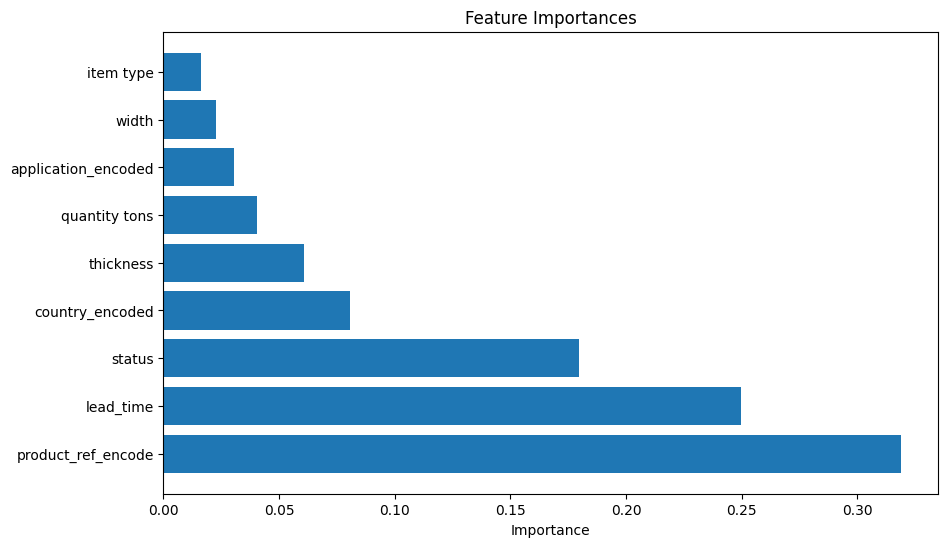

In [579]:

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [580]:
import pickle

# Save the trained model to a file
with open('trained_Regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [581]:
df5.describe()

,quantity tons,status,item type,thickness,width,selling_price,product_ref_encode,country_encoded,application_encoded,lead_time
count,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.00000
mean,49.174768,1.316698,4.133053,2.245464,1297.046009,819.053586,13.954592,8.518405,16.668533,65.22980
std,47.991510,1.330325,1.055231,1.890727,248.965742,209.161027,11.262672,2.919537,7.708365,39.52156
min,0.000010,0.000000,0.000000,0.180000,700.000000,243.000000,0.000000,0.000000,0.000000,1.00000
25%,10.970711,1.000000,3.000000,0.700000,1180.000000,669.000000,4.000000,6.000000,15.000000,30.00000
50%,30.364989,1.000000,5.000000,1.500000,1250.000000,812.000000,11.000000,8.000000,15.000000,62.00000
75%,67.159087,1.000000,5.000000,3.000000,1500.000000,953.000000,30.000000,11.000000,27.000000,97.00000
max,151.441652,8.000000,6.000000,6.450000,1980.000000,1379.000000,32.000000,16.000000,29.000000,448.00000


In [582]:
import pickle

# Save the trained model to a file
with open('df_Regression_model.pkl', 'wb') as file:
    pickle.dump(df5, file)

Classification for status

In [583]:
df_c = df5.copy()

# filter the status column values only 1 & 0 rows in a new dataframe ['Won':1 & 'Lost':0]
df_c = df_c[(df_c.status == 1) | (df_c.status == 0)]

In [584]:
df_c

,quantity tons,status,item type,thickness,width,selling_price,product_ref_encode,country_encoded,application_encoded,lead_time
1,151.441652,1,5.0,0.80,1210.0,1047.00,24,11,27,101.000000
2,151.441652,1,6.0,0.38,952.0,644.33,6,13,4,50.000000
3,151.441652,1,3.0,2.30,1317.0,768.00,24,10,2,61.783784
4,151.441652,1,5.0,4.00,1980.0,577.00,0,9,15,68.708063
5,151.441652,1,5.0,1.50,1265.0,983.00,24,11,27,23.666667
...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,0,3.0,6.00,1980.0,552.00,0,11,9,30.000000
181525,66.431473,0,3.0,3.85,1525.0,458.00,0,13,15,30.000000
181527,63.859521,0,3.0,5.85,1525.0,457.00,0,13,15,30.000000
181529,56.028562,0,3.0,6.45,1500.0,458.00,0,13,15,30.000000


In [585]:
df_c["status"].value_counts()

status
1    116007
0     34436
Name: count, dtype: int64

In [586]:
from sklearn.model_selection import train_test_split

X = df_c.drop(columns='status')
y = df_c.loc[:, 'status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 145)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112832, 9), (37611, 9), (112832,), (37611,))

In [587]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

f1_score(y_test, model.predict(X_test)), model.score(X_test, y_test)

(np.float64(0.9557799682911697), 0.9317752785089468)

In [588]:
from imblearn.combine import SMOTEENN

cc = SMOTEENN(random_state=7)

X_train_smoteenn, y_train_smoteenn = cc.fit_resample(X_train, y_train)

In [589]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from imblearn.combine import SMOTEENN

# Train the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and calculate the F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"F1 Score: {f1}")


F1 Score: 0.9244387336260128


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Loop through different depths to evaluate model performance
for depth in range(1, 40):  # Using range(1, 21) for depths 1 to 20
    model = DecisionTreeClassifier(max_depth=depth,random_state=42)  # Corrected class name
    model.fit(X_train, y_train)
    
    # Training score on the training set
    train_score = model.score(X_train, y_train)
    
    # Cross-validation score using 10-fold cross-validation
    cross_val = np.mean(cross_val_score(model, X_train, y_train, cv=10))
    
    # Print the results
    print(f"Depth - {depth}, TrainScore: {train_score:.4f}, Cross-ValScore: {cross_val:.4f}")


In [591]:


# Train the DecisionTreeClassifier with the correct parameter
model = DecisionTreeClassifier(random_state=42, max_depth=30)  # Corrected to max_depth
model.fit(X_train_smoteenn, y_train_smoteenn)

# Predict and calculate the F1 score
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print(f"F1 Score: {f1}")




F1 Score: 0.923552206289398


               Feature  Importance
8            lead_time    0.331028
1            item type    0.154631
0        quantity tons    0.102820
4        selling_price    0.094386
6      country_encoded    0.082189
7  application_encoded    0.073215
2            thickness    0.066275
5   product_ref_encode    0.061622
3                width    0.033834


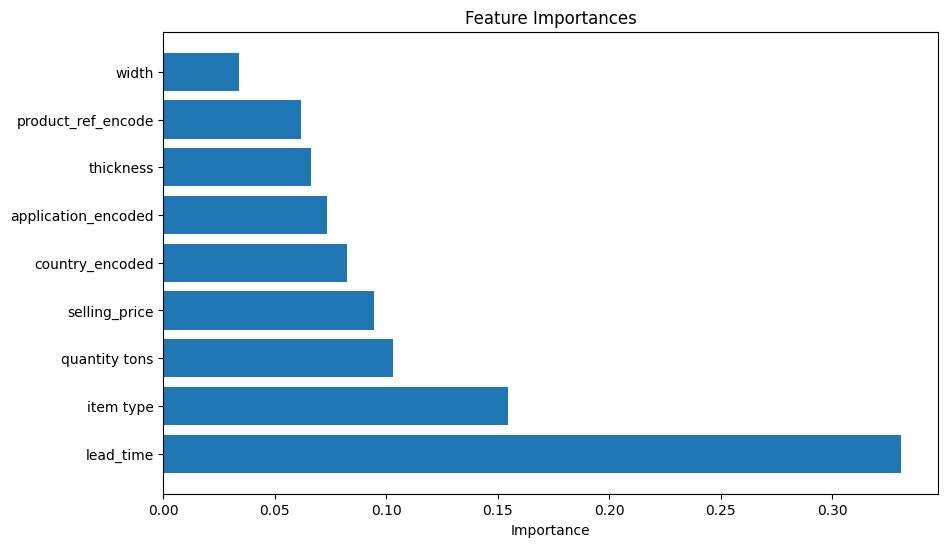

In [592]:

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance
feature_df = pd.DataFrame({
    'Feature': X_train.columns,  # Assuming X_train is a DataFrame
    'Importance': feature_importances
})

# Sort features by importance
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_df)

# Optional: Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()


In [593]:
df5

,quantity tons,status,item type,thickness,width,selling_price,product_ref_encode,country_encoded,application_encoded,lead_time
1,151.441652,1,5.0,0.80,1210.0,1047.00,24,11,27,101.000000
2,151.441652,1,6.0,0.38,952.0,644.33,6,13,4,50.000000
3,151.441652,1,3.0,2.30,1317.0,768.00,24,10,2,61.783784
4,151.441652,1,5.0,4.00,1980.0,577.00,0,9,15,68.708063
5,151.441652,1,5.0,1.50,1265.0,983.00,24,11,27,23.666667
...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,0,3.0,6.00,1980.0,552.00,0,11,9,30.000000
181525,66.431473,0,3.0,3.85,1525.0,458.00,0,13,15,30.000000
181527,63.859521,0,3.0,5.85,1525.0,457.00,0,13,15,30.000000
181529,56.028562,0,3.0,6.45,1500.0,458.00,0,13,15,30.000000


In [594]:
# Assuming you have trained your model and have original data in df_test and predictions

# 1. Predict values
predictions = model.predict(X_test)  # Replace `X_test` with the input DataFrame

# 2. Create a DataFrame with original and predicted values
df_comparison = X_test.copy()  # Copy the input features for context
df_comparison['Original'] = y_test.values  # Add the original target values
df_comparison['Predicted'] = predictions  # Add the predicted values

# Display the DataFrame
df_comparison


,quantity tons,item type,thickness,width,selling_price,product_ref_encode,country_encoded,application_encoded,lead_time,Original,Predicted
80958,9.273653,5.0,6.45,1980.0,690.0,0,6,15,53.0,1,1
151239,53.631088,5.0,6.00,1315.0,592.0,4,4,15,61.0,1,0
83337,15.933011,5.0,6.45,1500.0,823.0,8,11,9,114.0,1,1
39405,5.830582,5.0,5.40,1140.0,905.0,4,7,21,139.0,1,1
161402,63.150700,3.0,1.50,1000.0,501.0,6,1,15,58.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
57801,3.231594,5.0,1.00,1252.0,905.0,11,6,15,71.0,1,1
10814,26.666819,3.0,1.75,1189.0,889.0,4,5,3,75.0,1,1
49685,50.145521,3.0,5.00,1300.0,1047.0,24,11,27,93.0,0,1
10956,89.340026,5.0,3.00,1250.0,842.0,4,9,15,136.0,1,1


In [595]:
df_comparison.Predicted.value_counts()

Predicted
1    26957
0    10654
Name: count, dtype: int64

In [596]:
df5.describe()

,quantity tons,status,item type,thickness,width,selling_price,product_ref_encode,country_encoded,application_encoded,lead_time
count,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.000000,181665.00000
mean,49.174768,1.316698,4.133053,2.245464,1297.046009,819.053586,13.954592,8.518405,16.668533,65.22980
std,47.991510,1.330325,1.055231,1.890727,248.965742,209.161027,11.262672,2.919537,7.708365,39.52156
min,0.000010,0.000000,0.000000,0.180000,700.000000,243.000000,0.000000,0.000000,0.000000,1.00000
25%,10.970711,1.000000,3.000000,0.700000,1180.000000,669.000000,4.000000,6.000000,15.000000,30.00000
50%,30.364989,1.000000,5.000000,1.500000,1250.000000,812.000000,11.000000,8.000000,15.000000,62.00000
75%,67.159087,1.000000,5.000000,3.000000,1500.000000,953.000000,30.000000,11.000000,27.000000,97.00000
max,151.441652,8.000000,6.000000,6.450000,1980.000000,1379.000000,32.000000,16.000000,29.000000,448.00000


In [597]:
import pickle
# Save the trained model to a file
with open('trained_classification_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [598]:
import pickle

# Save the trained model to a file
with open('trained_classification_df_model.pkl', 'wb') as file:
    pickle.dump(df5, file)

In [599]:
df5

,quantity tons,status,item type,thickness,width,selling_price,product_ref_encode,country_encoded,application_encoded,lead_time
1,151.441652,1,5.0,0.80,1210.0,1047.00,24,11,27,101.000000
2,151.441652,1,6.0,0.38,952.0,644.33,6,13,4,50.000000
3,151.441652,1,3.0,2.30,1317.0,768.00,24,10,2,61.783784
4,151.441652,1,5.0,4.00,1980.0,577.00,0,9,15,68.708063
5,151.441652,1,5.0,1.50,1265.0,983.00,24,11,27,23.666667
...,...,...,...,...,...,...,...,...,...,...
181433,32.216122,0,3.0,6.00,1980.0,552.00,0,11,9,30.000000
181525,66.431473,0,3.0,3.85,1525.0,458.00,0,13,15,30.000000
181527,63.859521,0,3.0,5.85,1525.0,457.00,0,13,15,30.000000
181529,56.028562,0,3.0,6.45,1500.0,458.00,0,13,15,30.000000
